# Supporting Information

# qNMR fluorine pollution analysis:   \newline perspectives on PFAS exposure characterization using ^19^F NMR

*Laura Duciel, Julia Asencio Hernàndez, Marc-André Delsuc, Anne Briot-Dietsch^\*^*

**Corresponding author**   
**Anne Briot-Dietsch**   
**E-mail: anne.briot-dietsch@casc4de.eu**

### This PDF file includes:
Supporting text   
Figs. S1 to S10
Tables ST1 ST2

Licence : [CreativeCommon CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) ![](https://licensebuttons.net/i/l/by-sa/ffffff/00/00/00/88x31.png) 

{{< pagebreak >}}

In [2]:
import math as m
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from IPython.display import display, Markdown 

Fig = 1

In [3]:
display(Markdown('{{< pagebreak >}}'))
display(Markdown(f'# Fig-S{Fig} Measure of T~1~ on PFOA')) 
Fig += 1

{{< pagebreak >}}

# Fig-S1 Measure of T~1~ on PFOA

Inversion Recovery (IR) curve fits to determine longitudinal relaxation time T~1~ for different kind of nuclear spins in fluorinated moieties -CH~3~ -CH~2~ in the PFOA molecule.

![](T1_curves.pdf)

![](courbes_T1_PFOA.pdf)

    A  T1:  0.346 ± 0.0 sec  -  R1: 2.8914 ± 0.0001 sec⁻¹ 
    B  T1:  0.371 ± 0.0 sec  -  R1: 2.6958 ± 0.0002 sec⁻¹ 
    C  T1:  0.385 ± 0.0 sec  -  R1: 2.5943 ± 0.0002 sec⁻¹ 
    D  T1:  0.396 ± 0.0 sec  -  R1: 2.5242 ± 0.0001 sec⁻¹ 
    E  T1:  0.414 ± 0.0 sec  -  R1: 2.4149 ± 0.0001 sec⁻¹ 
    F  T1:  0.498 ± 0.0 sec  -  R1: 2.0064 ± 0.0001 sec⁻¹ 
    G  T1:  0.859 ± 0.0 sec  -  R1: 1.1641 ± 0.0 sec⁻¹ 

The -CH~2~ moiety located alpha to the functional group experiences the fastest longitudinal relaxation at $T_1A = 0.346\ s$ and the -CF~3~ moiety presents the longest T~1~ at $T_1G = 0.859\ s$


{{< pagebreak >}}

# Computing accuracy and precision,
given the flip angle, as a function of $T_1$ and the recovery time.

For a given flip angle and a given $T_R$ (recovery time), we can calculate the sensitivity, as a ratio to the full magnetization, and the accuracy computed as the biais against the ideal measure, both expressed in %.

This is performed with the two python functions below `seq()` and `snr()`.
The results are given in the tables T1 and T2 below, tabulated for varying $T_R / T_1$ and for different flip angles,
and shown in **Fig-S2** for all possible values of $T_R / T_1$.


In [4]:
#| echo: true
"""
these two functions are used to compute the steady magnetisation
and the sensitivity.

These two functions are then used to compute the table and the graphic
for varying value of TR/T1
"""

def seq(flip, Tr, niter=None):
    """
    given flip angle (in °) and Tr recovery time (in multiple of T1)
    it simulates the steady state with n iterations (or 10xT1 if n not given) 
    """
    M1 = 1.0
    if niter == None:
        niter = int(10/Tr +1)
    for i in range(niter):
        Mo = M1*m.cos((m.pi*flip)/180) # reste sur z après le pulse
        M1 = 1 - (1 - Mo)*m.exp(-Tr)  # sur z après Tr
    return M1

def snr(flip, Tr):
    "in % computed for a total acquisition time of 100 T1 (as NS is prop to Tr !)"
    Mx = seq(flip, Tr)*m.sin(m.pi*flip/180)
    return 100*Mx*m.sqrt(2/Tr)


In [5]:
Sig = {}
Sens = {}
Sens["TR/T1"] = [0.5,0.7,1,1.4,2,2.5,3,3.5] + list(range(4,11))
Sig["TR/T1"] = Sens["TR/T1"]
for P in (90, 60, 45, 30, 20):
    curr = f"{P}°"
    Sens[curr] = []
    Sig[curr] = []
    for Tr in Sens["TR/T1"]:
        Sig[curr].append( round(seq(P, Tr)*100,3) )
        Sens[curr].append( round(snr(P,Tr),2) )
display(Markdown(r'''
{{< pagebreak >}}

# Table ST1
## Accuracy in %
for varying pulse flip angle and varying $T_R/T_1$'''))

display(pd.DataFrame(Sig))

display(Markdown(r'''
{{< pagebreak >}}

# Table ST2
## Relative sensibility in %
for varying pulse flip angle and varying $T_R/T_1$'''))

display(pd.DataFrame(Sens))


{{< pagebreak >}}

# Table ST1
## Accuracy in %
for varying pulse flip angle and varying $T_R/T_1$

,TR/T1,90°,60°,45°,30°,20°
0,0.5,39.347,56.473,68.895,82.883,91.494
1,0.7,50.341,66.970,77.584,88.327,94.385
2,1.0,63.212,77.460,85.437,92.767,96.609
3,1.4,75.340,85.936,91.252,95.799,98.064
4,2.0,86.466,92.742,95.617,97.946,99.065
5,2.5,91.792,95.720,97.448,98.816,99.464
6,3.0,95.021,97.447,98.489,99.303,99.685
7,3.5,96.980,98.467,99.096,99.585,99.813
8,4.0,98.168,99.076,99.457,99.751,99.888
9,5.0,99.326,99.662,99.802,99.909,99.959



{{< pagebreak >}}

# Table ST2
## Relative sensibility in %
for varying pulse flip angle and varying $T_R/T_1$

,TR/T1,90°,60°,45°,30°,20°
0,0.5,78.69,97.81,97.43,82.88,62.59
1,0.7,85.09,98.03,92.73,74.65,54.57
2,1.0,89.40,94.87,85.44,65.60,46.73
3,1.4,90.05,88.95,77.12,57.25,40.09
4,2.0,86.47,80.32,67.61,48.97,33.88
5,2.5,82.10,74.14,61.63,44.19,30.43
6,3.0,77.58,68.91,56.86,40.54,27.84
7,3.5,73.31,64.46,52.97,37.64,25.81
8,4.0,69.42,60.67,49.73,35.27,24.16
9,5.0,62.82,54.59,44.63,31.59,21.62


From these tables, for a given sample, we consider

- the molecule's longest $T_1 : T_1^M$.
- the acceptable error rate

then choose in table ST1 the $T_R / T_1$ line where this error rate is found, either at 90° or at a lower angle $\Rightarrow$ this determines $\alpha = T_R / T_1$

Finally, given an acquisition time $AQ$ one can set $D1$ such that $T_R = D1 + AQ = \alpha \times T_1^M$.

{{< pagebreak >}}

# Fig-S2 Graphical output

Accuracy and Relative sensitivity, expressed in % for different pulse flip angle versus $T_R/T_1$

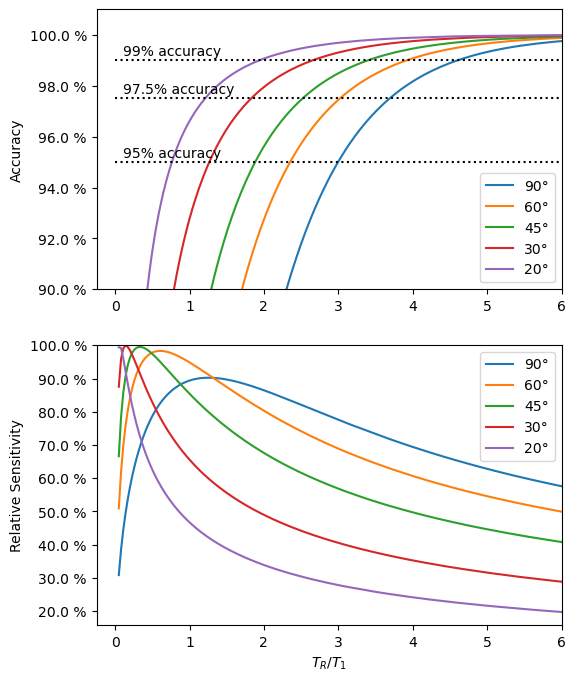

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
display(Markdown('{{< pagebreak >}}'))
display(Markdown(f'# Fig-S{Fig} Graphical output'))
Fig += 1

def percent(val,pos):
    return f"{val} %"
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(6,8))#, sharex=True)
TTr = np.linspace(0.05,6,200)
for P in (90, 60, 45, 30, 20):
    curr = f"{P}°"
    Sens[curr] = []
    Sig[curr] = []
    for Tr in TTr:
        Sig[curr].append( round(seq(P, Tr)*100,3) )
        Sens[curr].append( round(snr(P,Tr),2) )
    ax1.plot(TTr,Sig[curr],label=curr, xunits='%',)
    ax2.plot(TTr,Sens[curr],label=curr)
ax1.set_ylabel('Accuracy')
ax1.yaxis.set_major_formatter(percent)
ax1.set_ylim(ymin=90, ymax=101)
ax2.set_ylabel('Relative Sensitivity')
ax2.yaxis.set_major_formatter(percent)
ax2.set_xlabel(r'$T_R/T_1$')
ax1.set_xlim(xmax=6)
ax2.set_xlim(xmax=6)
ax2.set_ylim(ymax=100)

for acc in (99, 97.5, 95):
    ax1.plot([0,6],[acc,acc],':k')
    ax1.text(0.1,acc+0.2, f'{acc}% accuracy')

#fig.set_tight_layout(True)
ax1.legend();
ax2.legend();
display(Markdown(f'Accuracy and Relative sensitivity, expressed in % for different pulse flip angle versus $T_R/T_1$'))


{{< pagebreak >}}
# Robustness of the OPERA-45 sequence vs miss-calibration

In [7]:
display(Markdown(f'# Fig-S{Fig} Power miss-calibration'))
Fig += 1 

# Fig-S3 Power miss-calibration

![](offfset_dependnacemiscalib.png)

Experimental excitation profile measured by moving the carrier frequency of the OPERA-45 pulse on a 1mM PFOA sample in DMSO in optimized conditions, measure on the -CF~3~.

- **blue**: calibrated pulse
- **red**: 3\ dB miss-calibration of the B~1~ field *(30% error on the B~1~ amplitude)*
- **green**: 6\ dB miss-calibration of the B~1~ field *(50% error on the B~1~ amplitude)*

The excitation remains consistent across a 100\ kHz range of frequencies,
with fluctuation that do not exceed 1.5% in intensity for the 3\ dB missmatch and 3.5% for the 6\ dB missmatch.
    No phase distortion is observed in the 100\ kHz spectral range.

{{< pagebreak >}}

# 2D PULSE SEQUENCES

Here we present graphically the various NMR pulse sequences used in this study. 

In [8]:
# read OPERA shape
Amp = []
Phase = []
with open("PulseShapeFiles/OPERA-45") as F:
    for l in F:
        if not l.startswith('#'):
            a,p = [float(i) for i in l.split(',')]
            Amp.append(a)
            Phase.append(p)
Time = np.arange(0,80,80/len(Amp))  # 80 usec
Amp = np.array(Amp)*14.0/100.0      # 100% at 14kHz
Phase = np.array(Phase)
Phase = np.where(Phase>270, Phase-360, Phase) # fold back 360°-eps phases 


In [9]:
# define tools

mult = 2e-4        # time mult for display pulse us to delay s
acol = 'black'

def p90(ax, x,y,
    pmult = 1.2,     # intensity
    dp90 = 20,       # duration
       ):
    pp90 = pmult*np.array([0,1,1, 0]) +y
    tp90 = mult*np.array([0,0,dp90,dp90]) +x
    ax.fill_between(tp90,pp90,y,color=acol)
    return dp90*mult


def gradient(ax, x,y,duration,
    gmult = 0.8     # intensity
            ):
    tg = np.linspace(x,x+duration,100)
    grad = gmult*np.sin(np.pi*np.arange(100)/100)+y
    ax.plot(tg,grad, color='black')
    ax.fill_between(tg,grad,y,color='grey')
    return duration

# fid
def fid(ax, x, y, dur=0.15, intens=0.5,damp=40):
    tfid = np.linspace(0,dur,1000)
    val = intens*np.cos(2000*tfid)*np.exp(-damp*tfid) + y
    ax.plot(tfid+x, val, 'k')
    return val

def chirp(ax, x, y, dur=80, hight=0.5, width=1):
    durc = mult*dur
    hc = hight
    pc = np.array([0,hc,hc, 0]) +y
    tpc = np.array([0,0,durc,durc]) +x
    ax.plot(tpc,pc,'k')
    ax.annotate('', [x+durc,y+hc], [x,y], \
        arrowprops={'width':width,'headwidth':2*width, 'headlength':2*width, 'facecolor':'grey','shrink':0.1})
    return durc

def decoupl(ax,x,y,amp,dur, yshift=0.08):
    ax.fill_between([x,x+dur], [amp+y,amp+y], y,color='grey')
    ax.text(x,y+yshift,' Decoupling')

def vertline(ax,x,length):
    ax.plot([x,x],[0,length],':k')

def arrowtext(ax,x,y,length,text, xshift=0, yshift=0.08):
    ax.annotate(text='', xy=(x+length, y), xytext=(x,y), ha='center', va='bottom',
                arrowprops=dict(arrowstyle='<->'))
    ax.text(length/2+x+xshift,y+yshift, text)
    return length

def initialize(axislist=[ ('¹H',0), ('grad.',1.0)], To=-0.02, Ttot=1.0, figsize=(9,3) ):
    """
    create the scene and returns (fig,ax) as
        fig, ax = plt.subplots(figsize=figsize)
        would do
    axislist is the list of axes names and vertical positions   def: [ ('¹H',0), ('grad.',1.0) ]
    To and Ttot are initial and final times                     def: -0.02 and 1.0
    figsize                                                     def: (9,3)
    """
    ftsize = 12 
    fig, ax = plt.subplots(figsize=figsize)
    # create NMR axes
    for (name, off) in axislist:
        ax.arrow(To, off, Ttot, 0, color='black', lw=0.5, head_width=0.05, head_length=0.005)
        ax.text(To, off+0.7, name, fontsize=ftsize)

    for side in ['top','left','right','bottom']:
        ax.spines[side].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([]);

    return fig,ax

# Fig-S4 ^19^F-DOSY

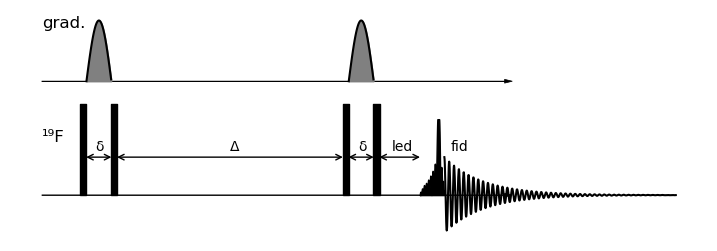

In [10]:
display(Markdown(f'# Fig-S{Fig} ^19^F-DOSY'))
Fig += 1

Ttot = 0.3
To = -0.025 #-mult*max(Time)

opera = Amp/max(Amp)
topera = Time*mult

goff = 1.5

delta = 2E-2   # in sec
Delta = 0.150
led = 3e-2

fig, ax1 = initialize(axislist=[('¹⁹F',0), ('grad.',goff)], To=To, Ttot=Ttot)
    
# HERE we do type ny type
# pulses
toff = 0
for off in [0,delta,Delta,delta]:
    toff += off
    dp90 = p90(ax1, toff,0)

toff += led

# opera
ax1.fill_between(topera+toff,opera,color='black')

# gradients
toff = 0
for off in [0,Delta+delta]:
    toff += off
    gradient(ax1,toff+dp90,goff,delta-dp90)
#    ax1.plot(tg+toff,grad+goff, color='black')
#    ax1.fill_between(tg+toff,grad+goff,goff,color='grey')

# fid
fid(ax1, Delta+2*delta+led+ max(topera), 0)

# arrows and texts
arrowtext(ax1, dp90/2, 0.5, delta,'δ',xshift=-0.002)

arrowtext(ax1, delta+dp90/2, 0.5, Delta,'Δ')

arrowtext(ax1, Delta+delta+dp90/2, 0.5, delta,'δ',xshift=-0.002)

arrowtext(ax1, Delta+2*delta+dp90/2, 0.5, led,'led',xshift=-0.005)

ax1.text(0.24, 0.58, 'fid');
#fig.savefig('seqDOSY.pdf')

The ^19^F-DOSY is based on the standard led ^[Gibbs SJ, Johnson CS. A PFG NMR experiment for accurate
diffusion and flow studies in the presence of eddy currents.
*J.Magn.Res.(1969)*  1991; **93**(2):395–402. doi:10.1016/0022‐2364(91)90014‐k] pulse sequence, with only the last reading pulse modified to incorporate the OPERA-45 pulse.
The spectral width is thus limited by the 4 strong pulses.
These should be 90° pulses, but shorter values can be used to extend the spectral range, with the difficulty of weakening the resulting signal.

In this experiment, all delays are kept constant, and the Pulsed Fielf Gradients (PFG) are varied in intensity, ranging from vanishing small to maximum intensities.



In [11]:
display(Markdown('{{< pagebreak >}}'))
#print('{{< pagebreak >}}\n')
display(Markdown(f'''
# Fig-S{Fig} ^19^F DOSY

A calibration DOSY spectrum was acquired on a mix made in purpose, composed of
PFMOPrA (MW=230D), TFE(MW=100D), and PFOS (MW=500D).
Acquisition was performed using 32 gradients linearly sampling from 0.48 to 47.19 G/cm for a total time of 37 minutes.
A Laplace transform of performed using the
PALMA algorithm^[PALMA, an improved algorithm for DOSY signal processing.
Cherni A., Chouzenoux É., Delsuc M-A.
(2017) *Analyst* **142** p772--779. doi:10.1039/C6AN01902A],
with a Laplace window of 50 to 5000 $\mu m^2/s$, $\lambda=0.01$ and 10,000 iterations.
The result is shown below.

Measured diffusion coefficients are
TFE: $720 \pm 15 \mu m^2/s$ ,
PFMOPrA: $553 \pm 20 \mu m^2/s$ ,
and
PFOS: $488 \pm 25 \mu m^2/s$ .


![](DOSYplt.png)

'''))


Fig += 1


{{< pagebreak >}}


# Fig-S5 ^19^F DOSY

A calibration DOSY spectrum was acquired on a mix made in purpose, composed of
PFMOPrA (MW=230D), TFE(MW=100D), and PFOS (MW=500D).
Acquisition was performed using 32 gradients linearly sampling from 0.48 to 47.19 G/cm for a total time of 37 minutes.
A Laplace transform of performed using the
PALMA algorithm^[PALMA, an improved algorithm for DOSY signal processing.
Cherni A., Chouzenoux É., Delsuc M-A.
(2017) *Analyst* **142** p772--779. doi:10.1039/C6AN01902A],
with a Laplace window of 50 to 5000 $\mu m^2/s$, $\lambda=0.01$ and 10,000 iterations.
The result is shown below.

Measured diffusion coefficients are
TFE: $720 \pm 15 \mu m^2/s$ ,
PFMOPrA: $553 \pm 20 \mu m^2/s$ ,
and
PFOS: $488 \pm 25 \mu m^2/s$ .


![](DOSYplt.png)



{{< pagebreak >}}



# Fig-S6 ^19^F-^19^F COSY45

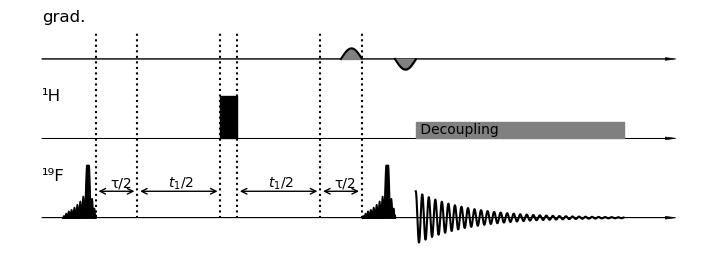

In [12]:
print('{{< pagebreak >}}\n')
display(Markdown(f'''# Fig-S{Fig} ^19^F-^19^F COSY45'''))

Fig += 1

# draw 
# axes
To = -0.01 #-mult*max(Time)

hoff = 1.5  # 1H offset
goff = 3    # gradiens shift

fig, ax1 = initialize(axislist=[('¹⁹F',0), ('¹H',hoff), ('grad.',goff)], To=To, Ttot=Ttot)

delta = 0.01
t1half = 0.04
tau = 0.04

# HERE we do sequentially

off = 0

ax1.fill_between(topera+off,opera,color=acol)
off +=  max(topera)

vertline(ax1,off,goff+0.5)

off += arrowtext(ax1, off, 0.5, tau/2,'τ/2',xshift=-0.003)

vertline(ax1,off,goff+0.5)

off += arrowtext(ax1, off, 0.5, t1half,r'$t_1 / 2$',xshift=-0.005)

vertline(ax1,off,goff+0.5)
off += p90(ax1, off, hoff,pmult=0.8, dp90=40)
vertline(ax1,off,goff+0.5)

off += arrowtext(ax1, off, 0.5, t1half, r'$t_1 / 2$',xshift=-0.005)

vertline(ax1, off, goff+0.5)
off += arrowtext(ax1, off, 0.5, tau/2,'τ/2',xshift=-0.003)
vertline(ax1, off, goff+0.5)

gradient(ax1, off-delta, goff, delta, gmult=0.2)

ax1.fill_between(topera+off,opera,color=acol)
off +=  max(topera)

off += gradient(ax1,off,goff,delta,gmult=-0.2)

fid(ax1,off,0, dur=0.1);
decoupl(ax1,off, hoff,0.3,dur=0.1)

#fig.savefig('seqCOSY.pdf')


The ^19^F-COSY-45 is nearly similar to the standard COSY-45 experiment^[A. BAX and R. FREEMAN. *J.Magn.Reson.* **44**, 542 (1981)],
except for the initial pulse which is also an OPERA-45

In order to enhance the signal-to-noise on ^1^H-coupled ^19^F molecules, a ^1^H decoupling was added to the sequence by a broad-band decoupling during acquisition and a 180° ^1^H pulse in the middle of the $t_1$ ^19^F evolution.
The delay $\tau$ allows the weaker J-couplings to be expressed as correlation peaks.
This is particularly useful, considering the very large F1 spectral width, implying short increments, and the limited number of increments.

Two versions of the coherence transfer pathways are possible: the standard anti-echo experiment with the two PFGs having inversed intensity, as presented here; and the echo experiment with both PFGs being equivalent.



In [13]:
"""
\tau value is 
  d0
  50u setnmr3|0 setnmr0|34|32|33 ctrlgrad 0
  p16:gp1
  d16 pl12:f2
d0 = 0.005
50u = 0.00005
d16=  0.0003
P16 = 0.001 
""";

In [14]:
display(Markdown('{{< pagebreak >}}'))
#print('{{< pagebreak >}}\n')
display(Markdown(f'''
# Fig-S{Fig} ^19^F COSY-45 of Vertrel
'''))

Fig += 1


{{< pagebreak >}}


# Fig-S7 ^19^F COSY-45 of Vertrel


The COSY-45 was measured on the same 2H,3H‐decafluoropentane sample than the HMQC (see text).
Each fid was acquired with a 100\ kHz spectral width (177.11\ ppm),
with the Digital filtering set to smooth, on 16\ k points and a 1.85\ s relaxation delay.
The ^19^F excitation pulse was the same OPERA-45 pulse as used in other experiments.
The ^1^H refocusing pulse had a duration of $24 \mu s$.
The gradients had a value of 15 G/cm and a $1\ ms$ duration sine-bell shape.
The $\tau / 2$ value was chosen at $6.35\ ms$. 
Four scans were acquired per increment and 2048 increments were performed for a total acquisition time of 4h 30min.


![](COSY-45.pdf)
The Broad-Band COSY-45 of the Vertel product

![](COSY-45-diag.pdf){width=50%}
Zoom showing the major and minor forms

![](COSY-45-zoom.pdf){width=30%}
Zoom showing the 45° effect
 

In [15]:
display(Markdown(f'''
# Fig-S{Fig} ^19^F COSY-45 of PFOA

A high resolution COSY-45 expermient was performed on PFOA (Per Fluorinated Octanoic Acid).
The experiment was performed on 100kHz spectral width on both axes, with 16k points acquisition and 8k increments.
Processing was performed in magnitude with sine-bell apodisation and no zerofilling.

![](COSYPFOA-25-02-17_15:56:46.pdf)
The COSY-45 of PFOA

<!-- ![](COSYPFOA-zoom-25-02-17_15:57:20.pdf) -->

![](COSY-PFOA-zoom-25-02-17_16:07:39.pdf)
Zoom of the CF~2~ region at a lower level, showing the long range couplings

'''))
Fig += 1



# Fig-S8 ^19^F COSY-45 of PFOA

A high resolution COSY-45 expermient was performed on PFOA (Per Fluorinated Octanoic Acid).
The experiment was performed on 100kHz spectral width on both axes, with 16k points acquisition and 8k increments.
Processing was performed in magnitude with sine-bell apodisation and no zerofilling.

![](COSYPFOA-25-02-17_15:56:46.pdf)
The COSY-45 of PFOA

<!-- ![](COSYPFOA-zoom-25-02-17_15:57:20.pdf) -->

![](COSY-PFOA-zoom-25-02-17_16:07:39.pdf)
Zoom of the CF~2~ region at a lower level, showing the long range couplings



{{< pagebreak >}}




# Fig-S9 ^19^F-^13^C sofast-HMQC

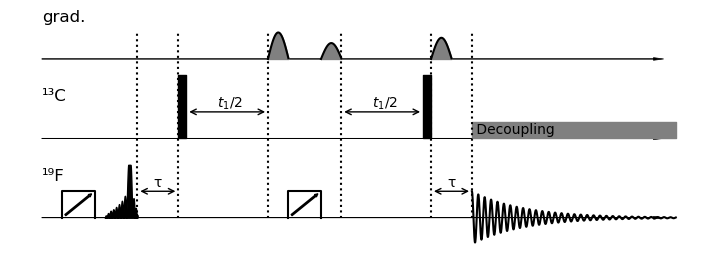

In [16]:
print('{{< pagebreak >}}\n\n')
display(Markdown(f'# Fig-S{Fig} ^19^F-^13^C sofast-HMQC'))
Fig += 1

 # draw chirp pulse at x,
coff = 1.5  # 1H offset
goff = 3    # gradiens shift

fig, ax1 = initialize(axislist=[('¹⁹F',0), ('¹³C',coff), ('grad.',goff)], To=To, Ttot=Ttot)

Jov2 = 0.02  # 1/2J

delta = 0.01

t1half = 0.04

# draw seq
off = chirp(ax1,0,0) +0.005

ax1.fill_between(topera+off,opera,color=acol)
off +=  max(topera)

vertline(ax1,off,goff+0.5)

off +=  arrowtext(ax1, off, 0.5, Jov2,r'τ',xshift=-0.002)

vertline(ax1,off,goff+0.5)

off += p90(ax1, off,coff)

off += arrowtext(ax1, off, coff+0.5, t1half,r'$t_1 / 2$',xshift=-0.005)

vertline(ax1,off,goff+0.5)

off += gradient(ax1,off,goff,delta,gmult=0.5)

off += chirp(ax1,off,0)

off += gradient(ax1,off,goff,delta,gmult=0.3)

vertline(ax1,off,goff+0.5)

off += arrowtext(ax1, off, coff+0.5, t1half,r'$t_1 / 2$',xshift=-0.005)

off += p90(ax1, off,coff)

vertline(ax1,off,goff+0.5)
gradient(ax1,off,goff,delta,gmult=0.40)
off += arrowtext(ax1, off, 0.5, Jov2,r'τ',xshift=-0.002)

vertline(ax1,off,goff+0.5)

fid(ax1,off,0, dur=0.1);
decoupl(ax1,off,coff,0.3,dur=0.1)
#fig.savefig('seqHMQC.pdf')

The HMQC sequence contains one excitation pulse implemented here with OPERA-45 and a refocusing pulse implemented here as a frequency swept (chirp) pulse of 1.5\ msec duration.
The $\tau$ delay allows to select a range of ^19^F-^13^C J-couplings to be observed,
we chose $\tau = \frac{1}{2J}$ with $J$ = 350\ Hz.

The sofast version^[
Schanda,P.;
Kup\v{c}e,E.;
Brutscher,B.
*J.Biomol.NMR* 2005, **33**,
199-211]
of the experiment uses a specific excitation pulse to improve the magnetisation steady state, which is implemented here with another chirp pulse just before the excitation pulse.


The three selection PFG were implemented with the following intensities of 50%,   30%, 41.27%  

{{< pagebreak >}}


In [17]:
print('{{< pagebreak >}}\n\n')
display(Markdown(f'# Fig-S{Fig} ^19^F-^13^C sofast-HMQC of PFOA'))
Fig += 1



{{< pagebreak >}}




# Fig-S10 ^19^F-^13^C sofast-HMQC of PFOA

A so-fast HMQC expermient was performed on PFOA.
The experiment was performed with  spectral widthes of 100\ kHz on ^19^F axis,
and 25\ kHz for ^13^C (165\ ppm)
The experiment was run in 4 scans, with 2k points acquisition and 368 increments, for a total acquisition time of 50\ min.
Processing was performed in magnitude with sine-bell apodisation and no zerofilling.

![](HMQC-PFOA.pdf)
The so-fast HMQC of PFOA


![](PFOA HMQC z22.pdf) Zoom on the CF~3~ region

![](PFOA HMQC z1.pdf)
Zoom on the CF~2~ region




In [18]:
print('{{< pagebreak >}}\n\n')
display(Markdown(f'# Fig-S{Fig} ^19^F Spectra of commercial toothpastes'))
Fig += 1



{{< pagebreak >}}




# Fig-S11 ^19^F Spectra of commercial toothpastes


Spectra of commercial toothpastes illustrating different formulations with fluoride-based additives used to prevent tooth decay, including sodium fluoride (NaF), sodium monofluorophosphate (Na~2~PO~3~F), stannous fluoride (SnF~2~), and Olaflur, an alkyl-ammonium fluoride. These common additives reflect different strategies for enamel strengthening, caries prevention, and oral health maintenance, depending on the formulation’s specific goals

![](toothpastes.pdf)
